In [1]:
"""Data inspection."""

'Data inspection.'

In [17]:
import csv
import glob
import matplotlib
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

from matplotlib import animation
import nibabel
import os
import sklearn
import shutil

import torch
import numpy as np
import pickle

import importlib
import analyze
importlib.reload(analyze)
import datasets
importlib.reload(datasets)
import vis
importlib.reload(vis)
import toyvis
importlib.reload(toyvis)
import toylosses
importlib.reload(toylosses)

NEURO_DIR = '/neuro/'

IMG_SHAPE = (15, 15)
SHAPE_STR = datasets.get_shape_string(IMG_SHAPE)
train_dataset, val_dataset = datasets.get_dataset_connectomes(img_shape=IMG_SHAPE)

TRAIN_IMG_PATH = '/neuro/train_val_datasets/train_conn_%s.npy' % SHAPE_STR
OUTPUT = '/scratch/users/nmiolane/imoutput_connectomes'
CMAP = 'Spectral'

Loading /neuro/train_val_datasets/train_conn_15x15.npy...
Loading /neuro/train_val_datasets/val_conn_15x15.npy...


From: https://www.humanconnectome.org/storage/app/media/documentation/s1200/HCP_S1200_Release_Reference_Manual.pdf

1. netmats1: Using "full" normalized temporal correlation between every node timeseries
and every other. This is a common approach and is very simple, but it has various
practical and interpretational disadvantages [Smith 2012].
2. netmats2: Using partial temporal correlation between nodes' timeseries. This aims to
estimate direct connection strengths better than achieved by full correlation. To slightly
improve the estimates of partial correlation coefficients, a small amount of L2
regularization is applied (setting rho=0.01 in the Ridge Regression netmats option in
FSLNets) [Smith OHBM 2014, FSLNets]. 

In [2]:
print(train_dataset.shape)
print(np.min(train_dataset))
print(np.max(train_dataset))

(649, 1, 15, 15)
-38.02203468669999
72.4955416336857


In [23]:
toylosses.is_spd(train_dataset[:, 0, :, :])

one_conn = train_dataset[4][0]
print(np.linalg.det(one_conn))


def laplacian(a):
    d = np.diag(np.array(a.sum(1)).flatten())
    return d-a

print(np.diag(one_conn)) 
one_conn_r = one_conn #r_from_z(one_conn)
one_conn2 = laplacian(one_conn_r) + np.eye(IMG_SHAPE[0])

assert gln.belongs(np.abs(one_conn_r))
assert mat_space.is_symmetric(one_conn_r)

assert is_pos_def(one_conn_r)

eig, vec = np.linalg.eig(one_conn_r)
print(eig)

print(np.min(one_conn_r))
print(np.max(one_conn_r))

dist = spd_space.metric.dist(train_dataset[4][0], train_dataset[1][0])
print(dist)

4.1347417857952906e+18
[14.66533078 23.69358162 18.5009287  20.97197158 18.22327386 17.33912605
 17.8314678  12.22317422  9.8453935  15.95084759 19.90724511 12.66488278
 18.07738441  7.06788835 11.72378836 15.87685508 15.63567894 11.72559451
  8.3605313  14.09783447  8.12462889 12.36122579 11.48487559  2.81153679
  5.25463302]
[5.40412208e+01 4.21237748e+01 3.20069582e+01 2.76611845e+01
 2.64130559e+01 2.46731590e+01 2.28648173e+01 2.02196920e+01
 1.98184228e+01 1.22887410e+01 1.06603289e+01 9.72025202e+00
 9.25418831e+00 8.36826429e+00 5.49981528e+00 5.07462318e+00
 4.24134083e+00 2.82248169e+00 2.37736102e+00 3.09632236e-02
 2.04510981e-01 4.27825890e-01 8.26299848e-01 1.43251550e+00
 1.36788177e+00]
-6.8159285125833335
23.693581622766665
point
(25, 25)
base_point
(25, 25)
sqrt_base_point
(1, 25, 25)
sqrt_base_point
[[[ 3.28417897e+00  1.04987073e+00 -2.90627583e-01 -9.54119885e-02
    7.72082361e-01 -8.39788789e-02  3.84953359e-01 -1.57587898e-01
   -2.18935561e-01 -7.24430858e-01  

In [3]:
train, val = datasets.get_loaders('connectomes', img_shape=IMG_SHAPE, batch_size=8)

Loading /neuro/train_val_datasets/train_conn_15x15.npy...
Loading /neuro/train_val_datasets/val_conn_15x15.npy...


Loading /neuro/train_val_datasets/train_conn_15x15.npy
Dataset shape: (649, 1, 15, 15)


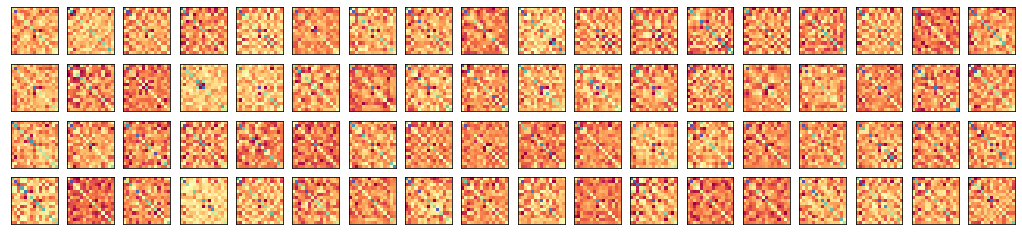

In [4]:
vis.show_data(TRAIN_IMG_PATH, cmap=CMAP)

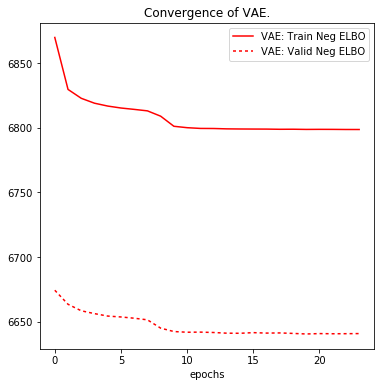

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax = toyvis.plot_convergence(ax, OUTPUT, 'vae', 'neg_elbo', from_epoch=0, to_epoch=24)

In [12]:
LATEN
epoch_id = 1
vis.plot_img_and_recon(OUTPUT, epoch_id=epoch_id, cmap=CMAP)

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/users/nmiolane/imoutput_connectomes/training/imgs/epoch_1_data.npy'

Loading: /scratch/users/nmiolane/imoutput_connectomes/train_vae/models/decoder.pth


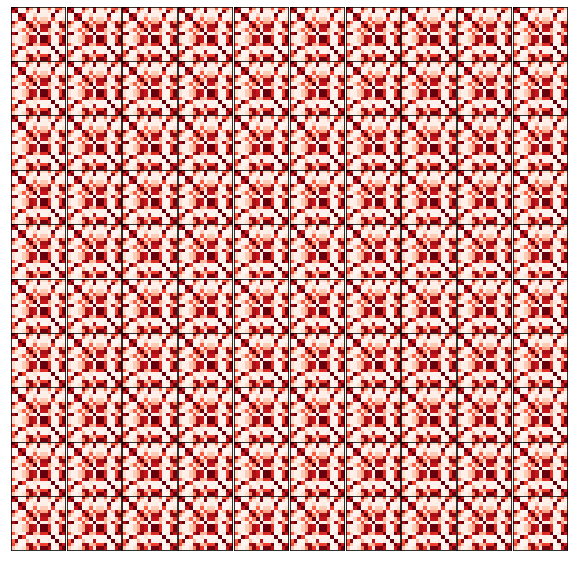

In [21]:
fig = plt.figure(figsize=(10, 10))
outer = gridspec.GridSpec(1, 1, wspace=0.1, hspace=0.1)
LATENT_DIM = 30
DATA_DIM = IMG_SHAPE[0]*IMG_SHAPE[1]
for i, algo_name in enumerate(['vae']):
    toyvis.show_samples(OUTPUT, fig, outer, i, algo_name, latent_dim=LATENT_DIM, data_dim=DATA_DIM)
fig.show()

Shape of img data:
(3, 1, 100, 100)
Shape of recon:
(3, 1, 100, 100)


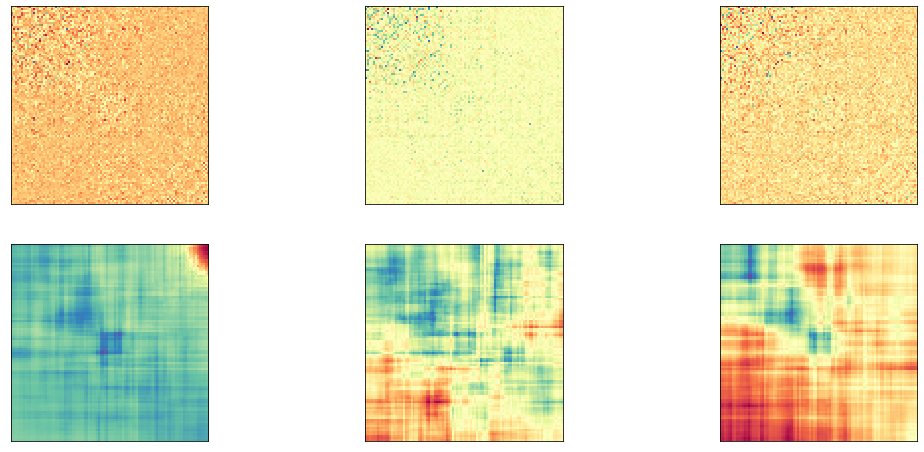

In [8]:
epoch_id = 5
vis.plot_img_and_recon(OUTPUT, epoch_id=epoch_id, cmap=CMAP)

In [22]:
epoch_id = 1
ax = vis.plot_variance_explained(OUTPUT, TRAIN_IMG_PATH, epoch_id=epoch_id)

IndexError: list index out of range

Loading: /scratch/users/nmiolane/output_connectomes/training/models/epoch_10_encoder_train_loss_6613.7961_val_loss_6643.0544.pth


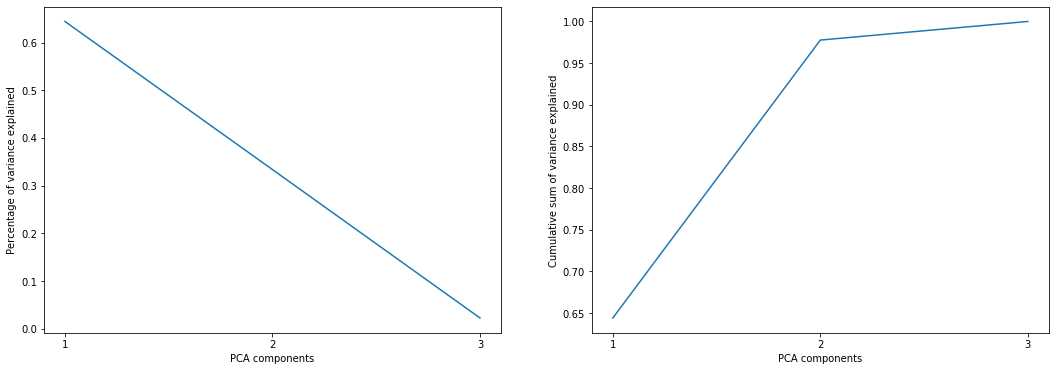

In [14]:
epoch_id = 10
ax = vis.plot_variance_explained(OUTPUT, TRAIN_IMG_PATH, epoch_id=epoch_id)

Loading: /scratch/users/nmiolane/output_connectomes/training/models/epoch_20_encoder_train_loss_6571.0562_val_loss_6632.0458.pth


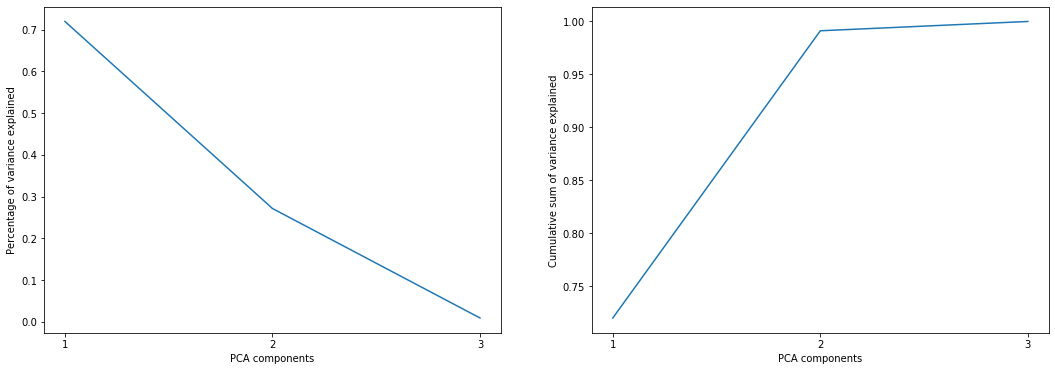

In [15]:
epoch_id = 20
ax = vis.plot_variance_explained(OUTPUT, TRAIN_IMG_PATH, epoch_id=epoch_id)

Loading: /scratch/users/nmiolane/output_connectomes/training/models/epoch_30_encoder_train_loss_6559.3464_val_loss_6578.0844.pth


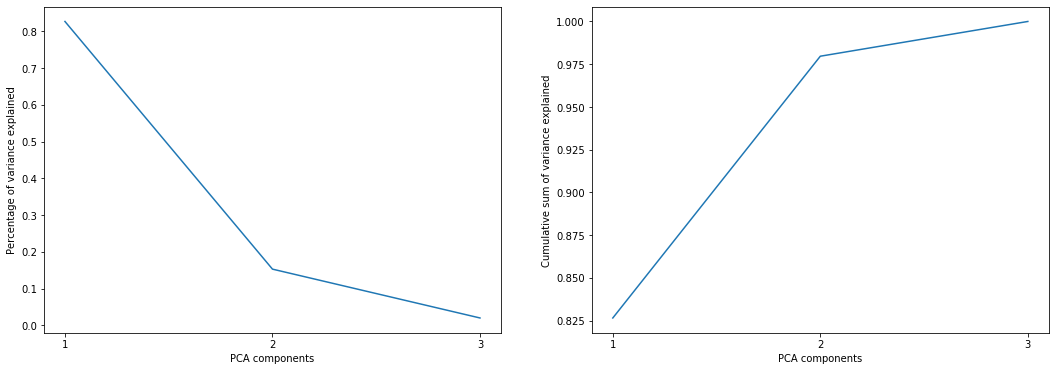

In [24]:
epoch_id = 30
ax = vis.plot_variance_explained(OUTPUT, TRAIN_IMG_PATH, epoch_id=epoch_id)

Loading: /scratch/users/nmiolane/output_connectomes/training/models/epoch_30_encoder_train_loss_6559.3464_val_loss_6578.0844.pth


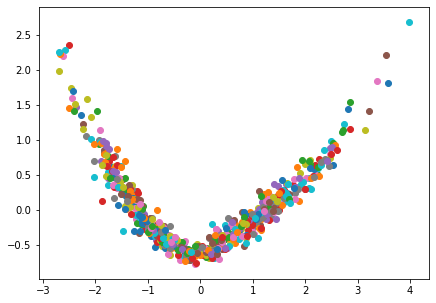

In [25]:
epoch_id = 30
n_pcs = 2
dataset = np.load(TRAIN_IMG_PATH)

mus = analyze.latent_projection(OUTPUT, dataset, epoch_id=epoch_id)
_, projected_mus = analyze.pca_projection(mus, n_pcs)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

for mu in projected_mus:
    if n_pcs == 2:
        im = ax.scatter(mu[0], mu[1]) 
    else:
        im = ax.scatter(mu[0], mu[1], mu[2])

Loading: /scratch/users/nmiolane/output_connectomes/training/models/epoch_50_encoder_train_loss_6553.4051_val_loss_6577.4475.pth


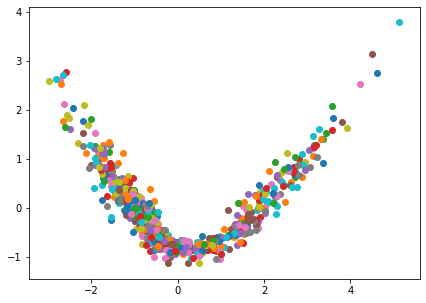

In [23]:
epoch_id = 50
n_pcs = 2
dataset = np.load(TRAIN_IMG_PATH)

mus = analyze.latent_projection(OUTPUT, dataset, epoch_id=epoch_id)
_, projected_mus = analyze.pca_projection(mus, n_pcs)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

for mu in projected_mus:
    if n_pcs == 2:
        im = ax.scatter(mu[0], mu[1]) 
    else:
        im = ax.scatter(mu[0], mu[1], mu[2])